In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the data
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [38]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [39]:
df.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00
307644,2020,9,RELIABLE CHURCHILL LLLP,97969,S SMITH WINTER WELCOME 4/6NR - 12OZ,BEER,0.00,0.0,1.00


In [40]:
df['ITEM TYPE'].value_counts()

ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1908
STR_SUPPLIES       405
REF                127
DUNNAGE             95
Name: count, dtype: int64

In [41]:
# Dropping supplier, item code and item description columns
df = df.drop(['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION'], axis=1)
df.head()

,YEAR,MONTH,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,WINE,0.00,0.0,2.0
1,2020,1,WINE,0.00,1.0,4.0
2,2020,1,BEER,0.00,0.0,1.0
3,2020,1,WINE,0.00,0.0,1.0
4,2020,1,WINE,0.82,0.0,0.0


In [42]:
df.shape

(307645, 6)

In [43]:
df.isnull().sum()

YEAR                0
MONTH               0
ITEM TYPE           1
RETAIL SALES        3
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [45]:
# Fill missing values in the ITEM TYPE column with the most frequent value
most_frequent_item_type = df['ITEM TYPE'].mode()[0]
df['ITEM TYPE'] = df['ITEM TYPE'].fillna(most_frequent_item_type)

# Fill missing values in the RETAIL SALES column with the median value
median_retail_sales = df['RETAIL SALES'].median()
df['RETAIL SALES'] = df['RETAIL SALES'].fillna(median_retail_sales)

df.isnull().sum()

YEAR                0
MONTH               0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [46]:
df.columns

Index(['YEAR', 'MONTH', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS',
       'WAREHOUSE SALES'],
      dtype='object')

In [100]:
from copy import deepcopy
df1 = deepcopy(df)

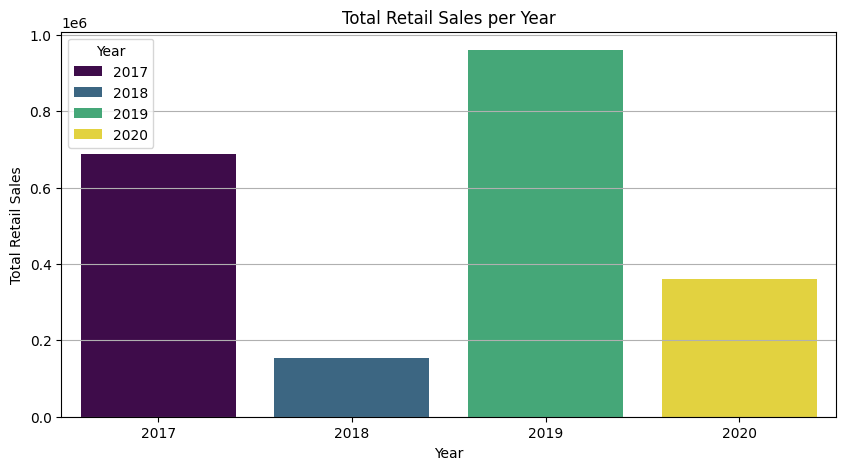

In [101]:
yearly_sales = df1.groupby('YEAR')['RETAIL SALES'].sum().reset_index()

# Creating a bar plot with color based on the YEAR variable
plt.figure(figsize=(10, 5))
sns.barplot(x='YEAR', y='RETAIL SALES', hue='YEAR', data=yearly_sales, palette='viridis', dodge=False)
plt.title('Total Retail Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Retail Sales')
plt.grid(axis='y')
plt.legend(title='Year', loc='upper left')
plt.show()

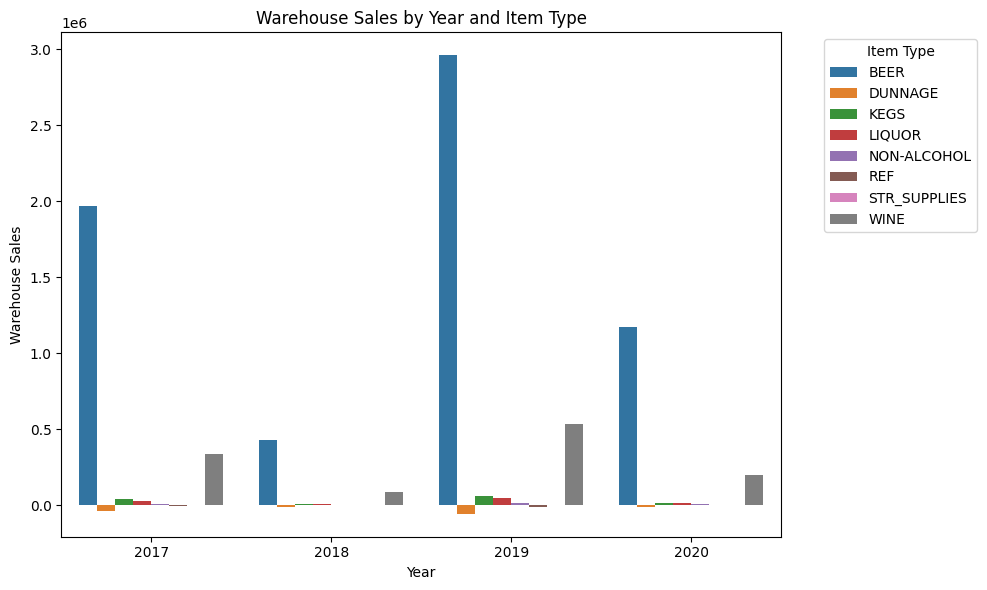

In [102]:
grouped_sales = df.groupby(['YEAR', 'ITEM TYPE'])['WAREHOUSE SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='WAREHOUSE SALES', hue='ITEM TYPE', data=grouped_sales)
plt.title("Warehouse Sales by Year and Item Type")
plt.xlabel("Year")
plt.ylabel("Warehouse Sales")
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

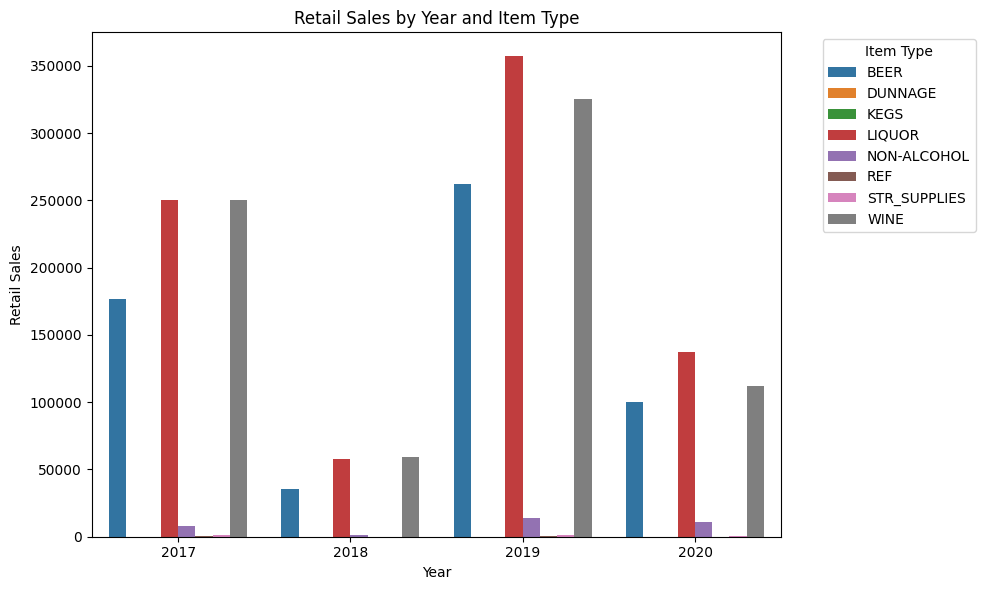

In [103]:
grouped_sales = df.groupby(['YEAR', 'ITEM TYPE'])['RETAIL SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='RETAIL SALES', hue='ITEM TYPE', data=grouped_sales)
plt.title("Retail Sales by Year and Item Type")
plt.xlabel("Year")
plt.ylabel("Retail Sales")
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

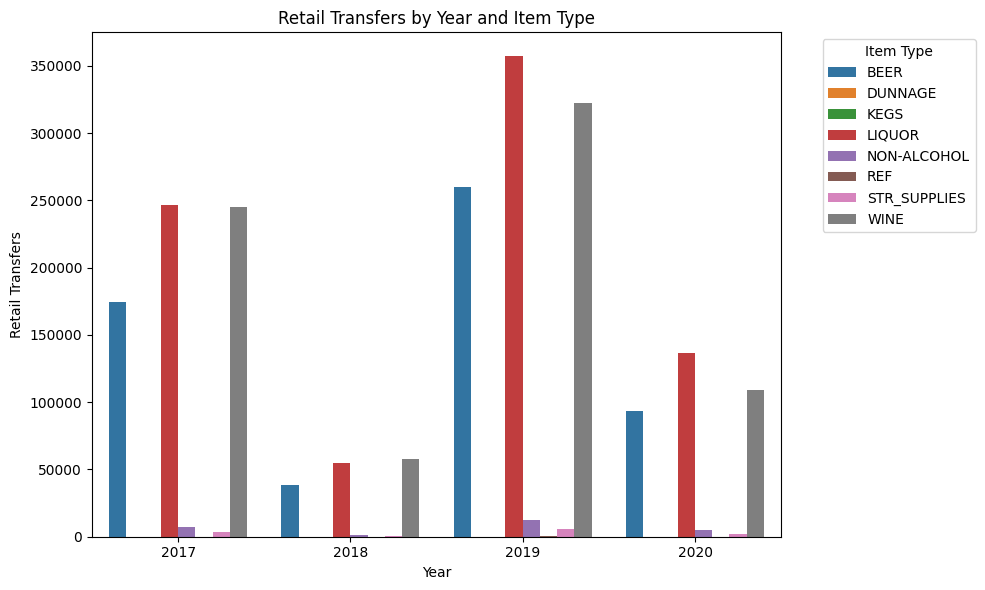

In [104]:
grouped_sales = df.groupby(['YEAR', 'ITEM TYPE'])['RETAIL TRANSFERS'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='RETAIL TRANSFERS', hue='ITEM TYPE', data=grouped_sales)
plt.title("Retail Transfers by Year and Item Type")
plt.xlabel("Year")
plt.ylabel("Retail Transfers")
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

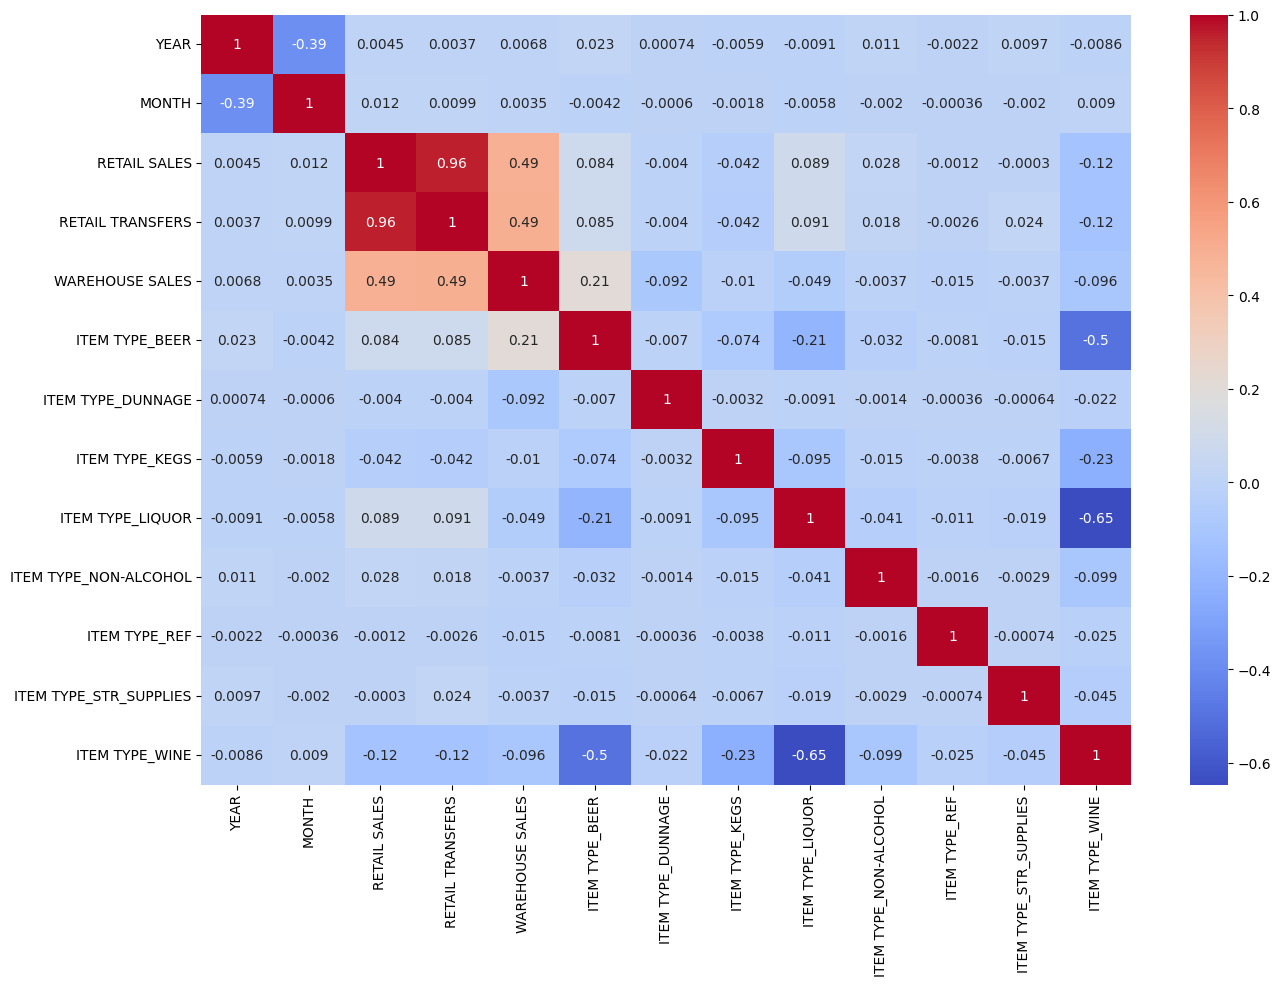

In [105]:
# One-hot encode the ITEM TYPE column
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(df1[['ITEM TYPE']]).toarray()
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['ITEM TYPE']))

# Concatenate the encoded columns with the original dataframe
data_encoded = pd.concat([df1.drop(columns=['ITEM TYPE']), encoded_columns_df], axis=1)

# Heatmap Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

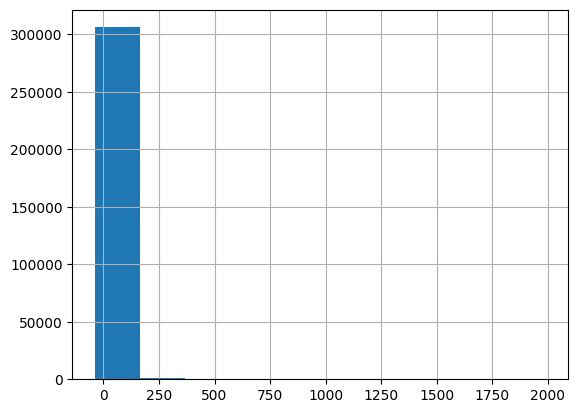

In [107]:
df1['RETAIL TRANSFERS'].hist()

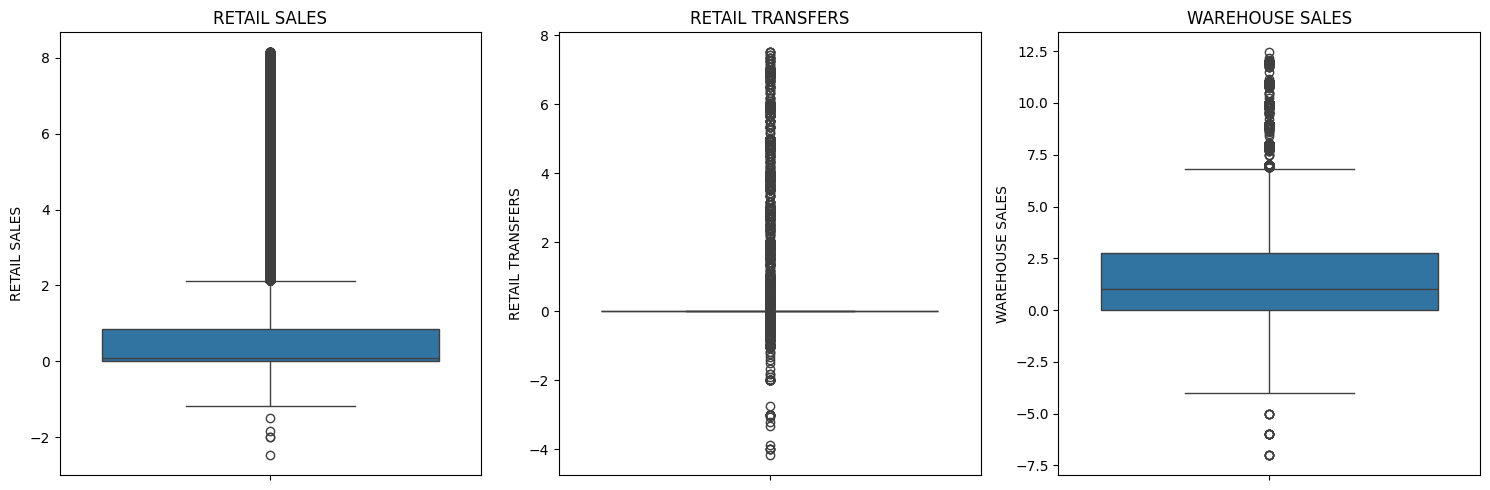

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame already exists with the required columns,
# e.g., 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'

# Removing outliers using the IQR method
cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
filter_condition = np.ones(len(df1), dtype=bool)

for col in cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filter_condition &= df1[col].between(lower_bound, upper_bound)

# DataFrame without outliers
data_no_outliers = df1[filter_condition]

# Plotting box plots separately
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data_no_outliers[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [112]:
# Apply log transformation after clipping negative values to 0
df1['Log_Retail_Sales'] = np.log1p(np.clip(df1['RETAIL SALES'], 0, None) + 1e-9)
df1['Log_Retail_Transfers'] = np.log1p(np.clip(df1['RETAIL TRANSFERS'], 0, None) + 1e-9)

# Display the first few rows to verify the transformation
df1[['RETAIL SALES', 'Log_Retail_Sales', 'RETAIL TRANSFERS', 'Log_Retail_Transfers']].head()

,RETAIL SALES,Log_Retail_Sales,RETAIL TRANSFERS,Log_Retail_Transfers
0,0.00,1.000000e-09,0.0,1.000000e-09
1,0.00,1.000000e-09,1.0,6.931472e-01
2,0.00,1.000000e-09,0.0,1.000000e-09
3,0.00,1.000000e-09,0.0,1.000000e-09
4,0.82,5.988365e-01,0.0,1.000000e-09


<Axes: >

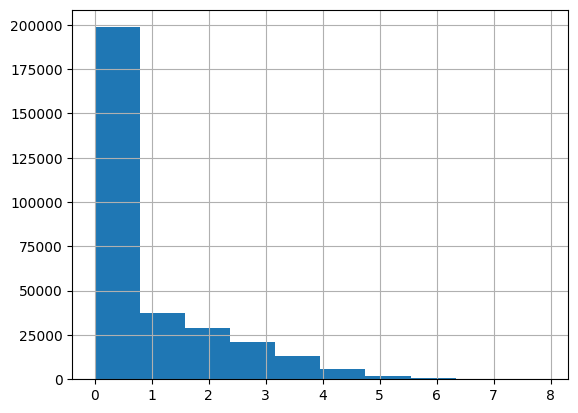

In [113]:
df1['Log_Retail_Sales'].hist()

<Axes: >

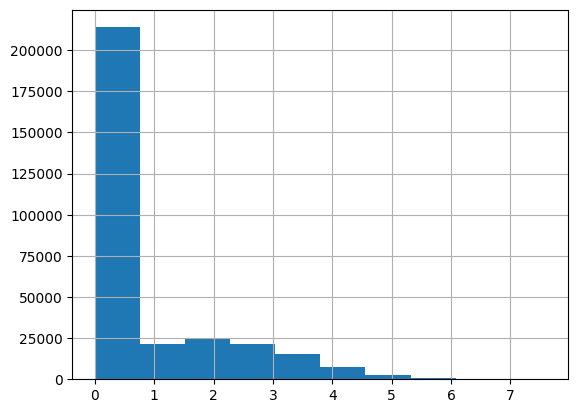

In [114]:
df1['Log_Retail_Transfers'].hist()

In [115]:
df1 = df1.drop(['YEAR', 'MONTH'], axis=1)
df1.head()

,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Log_Retail_Sales,Log_Retail_Transfers
0,WINE,0.00,0.0,2.0,1.000000e-09,1.000000e-09
1,WINE,0.00,1.0,4.0,1.000000e-09,6.931472e-01
2,BEER,0.00,0.0,1.0,1.000000e-09,1.000000e-09
3,WINE,0.00,0.0,1.0,1.000000e-09,1.000000e-09
4,WINE,0.82,0.0,0.0,5.988365e-01,1.000000e-09


In [134]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

df2 = deepcopy(df1)

X = df2[['ITEM TYPE',]]
y = df2[['Log_Retail_Sales', 'Log_Retail_Transfers']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to ordinal encode ITEM TYPE and leave the log-transformed columns unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('ord_enc', OrdinalEncoder(), ['ITEM TYPE'])
    ],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Build a pipeline that first transforms the data and then applies logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Prepare features from df2: use the ordinal encoded ITEM TYPE along with Log_Retail_Sales and Log_Retail_Transfers
# Create a binary target as an example (e.g., whether the Log_Retail_Sales is above its median)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ord_enc', OrdinalEncoder(),
                                                  ['ITEM TYPE'])])),
                ('classifier', LinearRegression())])

In [135]:
y_pred = pipeline.predict(X_test)

# Accuracy Score
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy Score: {accuracy}')

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Accuracy Score: 0.02054780162253156
R^2 Score: 0.02054780162253156
Mean Squared Error: 1.4741102794860343
Root Mean Squared Error: 1.2141294327566705
